# Sprint18 データセット作成

In [74]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras import optimizers
from keras.preprocessing.image import load_img, img_to_array
from PIL import Image
import tensorflow as tf
import numpy as np
import os
import glob 
import re
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import glob
import numpy as np
%matplotlib inline


In [75]:
# 基本的なグローバル変数を定義
EPOCHS = 15
IMG_HEIGHT = 224
IMG_WIDTH = 224

In [76]:
image_path_list = glob.glob(r'train_image/cat/*')+glob.glob(r'train_image/dog/*')
image_path_list
# r'train_image/cat/*'

['train_image/cat/cat_1.jpeg',
 'train_image/cat/cat_2.jpeg',
 'train_image/cat/cat_3.jpeg',
 'train_image/cat/cat_4.jpeg',
 'train_image/cat/cat_5.jpeg',
 'train_image/dog/dog_1.jpeg',
 'train_image/dog/dog_3.jpeg',
 'train_image/dog/dog_2.jpeg',
 'train_image/dog/dog_5.jpeg',
 'train_image/dog/dog_4.jpeg']

In [77]:
# 説明変数と目的変数格納用変数
x = []
y = []

# 画像パスでループ
for image_path in image_path_list:
    # 正解ラベルを格納
    if image_path.find('dog')!=-1:
        y.append([0])
    else:
        y.append([1])
    # 画像データを格納
    image = load_img(image_path, grayscale=False, color_mode='rgb', target_size=(IMG_HEIGHT,IMG_WIDTH))
    image_array = img_to_array(image) / 255
    x.append(image_array)

# numpy配列化
x = np.array(x)
y = np.array(y)

In [78]:
x.shape, y.shape

((10, 224, 224, 3), (10, 1))

In [79]:
# print(f'dog_image:{dog_img_array.shape}  cat_image:{cat_img_array.shape}')

In [80]:
# モデル定義
# - - - # # # 使い方を再度チェックする # # # - - -
# Kerasをインタンス定義
model = Sequential([
    Conv2D(16, 3, activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])
# コンパイル
model.compile(loss="binary_crossentropy", optimizer=optimizers.Adam(lr=0.001), metrics=["accuracy"])

In [81]:
model.fit(x,y, epochs=EPOCHS)

Epoch 1/15
10/10 [==============================] - 2s 199ms/step - loss: 0.6890 - accuracy: 0.5000
Epoch 2/15
10/10 [==============================] - 0s 38ms/step - loss: 0.3673 - accuracy: 0.8000
Epoch 3/15
10/10 [==============================] - 0s 43ms/step - loss: 3.6055 - accuracy: 0.5000
Epoch 4/15
10/10 [==============================] - 0s 36ms/step - loss: 0.5389 - accuracy: 0.5000
Epoch 5/15
10/10 [==============================] - 0s 41ms/step - loss: 0.7188 - accuracy: 0.5000
Epoch 6/15
10/10 [==============================] - 0s 34ms/step - loss: 0.8531 - accuracy: 0.5000
Epoch 7/15
10/10 [==============================] - 0s 34ms/step - loss: 0.4892 - accuracy: 0.5000
Epoch 8/15
10/10 [==============================] - 0s 34ms/step - loss: 0.2632 - accuracy: 1.0000
Epoch 9/15
10/10 [==============================] - 0s 34ms/step - loss: 0.1846 - accuracy: 1.0000
Epoch 10/15
10/10 [==============================] - 0s 34ms/step - loss: 0.1478 - accuracy: 1.0000
Epoch 11

In [82]:
# 予測
np.where(model.predict(x)<=0.5,1,0).reshape(-1)

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

## 問題2　分類データセットに対するデータ拡張

集めた画像をデータ拡張（Data Augmentation）してください。

画像を反転させたり、色を変えたり、クロッピング（一部だけ切り出す）などをしましょう。

また、下記にデータ拡張のためのライブラリがありますので、参考になりましたら幸いです。

### 《データ拡張の効果の調査》


データ拡張にはさまざまな方法があります。今回のタスクにおいて各手法がどう効果があるかを実験・考察してください。


データを水増しされる際は、こちらの水増しテクニックについての参考論文（嬉しい日本語）などご参照ください。

### 《データ拡張のためのライブラリ》


データ拡張にはalbumentationsなどがあります。

DIVERで推奨しているライブラリ


KerasのImageDataGeneratorというデータ拡張機能を利用します。

https://keras.io/ja/preprocessing/image/

In [83]:
# ImageDataGeneratorのインスタンス化
image_generator = ImageDataGenerator(
    rescale=1./255,
    width_shift_range = 0.1
)

image_generator

In [84]:
# ジェネレータ定義 flow_from_directoryメソッドを使う
gen_train = image_generator.flow_from_directory(
    batch_size=1,
    directory='train_image',
    classes = ['dog', 'cat'],
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)
gen_train

Found 10 images belonging to 2 classes.


(1, 224, 224, 3) [1.]


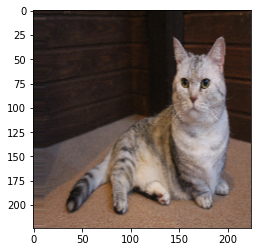

In [85]:
# 呼び出し確認
image, label = next(gen_train)

# shape確認
print(image.shape, label)

# 描画
plt.imshow(image[0])

In [86]:
tf.test.gpu_device_name() 
# モデル定義
model = Sequential([
    Conv2D(16, 3, activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])
# コンパイル
model.compile(loss="binary_crossentropy", optimizer=optimizers.Adam(lr=0.001), metrics=["accuracy"])

In [87]:
# 学習
model.fit_generator(generator=gen_train, epochs=EPOCHS ,steps_per_epoch=10)

Epoch 1/15
10/10 [==============================] - 4s 435ms/step - loss: 3.1110 - accuracy: 0.4000
Epoch 2/15
10/10 [==============================] - 3s 339ms/step - loss: 0.8642 - accuracy: 0.4000
Epoch 3/15
10/10 [==============================] - 4s 369ms/step - loss: 0.7404 - accuracy: 0.5000
Epoch 4/15
10/10 [==============================] - 3s 345ms/step - loss: 0.7588 - accuracy: 0.5000
Epoch 5/15
10/10 [==============================] - 4s 359ms/step - loss: 0.6930 - accuracy: 0.6000
Epoch 6/15
10/10 [==============================] - 3s 349ms/step - loss: 0.6040 - accuracy: 0.9000
Epoch 7/15
10/10 [==============================] - 4s 352ms/step - loss: 0.4810 - accuracy: 0.8000
Epoch 8/15
10/10 [==============================] - 4s 386ms/step - loss: 1.1448 - accuracy: 0.5000
Epoch 9/15
10/10 [==============================] - 4s 380ms/step - loss: 0.4755 - accuracy: 0.8000
Epoch 10/15
10/10 [==============================] - 4s 393ms/step - loss: 0.3116 - accuracy: 1.0000

In [88]:
# 予測
np.where(model.predict(x)<=0.5,1,0)

array([[0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1]])

## 問題3　物体検出データセットの用意

In [89]:
# 基本的なグローバル変数を定義
BOX_COLOR = (255, 0, 0)
TEXT_COLOR = (255, 255, 255)

In [92]:
## BBoxを描画する関数の定義
def visualize_bbox(img, bbox, class_id, class_idx_to_name, color=BOX_COLOR, thickness=2):
    """BBox描画
    Parameters
    -------------
    img : 画像
    bbox : BBox座標
    class_id : クラスラベル
    class_idx_to_name : クラスラベルの名前
    color=BOX_COLOR : BBoxの線色
    thickness : BBoxの線太さ
    """
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    class_name = class_idx_to_name[class_id]
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.3, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(img, class_name, (x_min, y_min - int(0.3 * text_height)), cv2.FONT_HERSHEY_SIMPLEX, 0.3,TEXT_COLOR, lineType=cv2.LINE_AA)
    return img

def visualize(annotations, category_id_to_name):
    """複数のBBoxにも対応できる関数
    Parameters
    ----------------
    annotations : 画像とBBoxの情報
    category_id_to_name : クラスラベルとクラスラベルの名前
    """
    img = annotations['image'].copy()
    for idx, bbox in enumerate(annotations['bboxes']):
        img = visualize_bbox(img, bbox, annotations['category_id'][idx], category_id_to_name)
    plt.figure(figsize=(7, 7))
    plt.imshow(img)

In [93]:
# # ■オリジナル（https://albumentations.ai/docs/examples/example_bboxes/）
# def visualize_bbox(img, bbox, class_name, color=BOX_COLOR, thickness=2):
#     """Visualizes a single bounding box on the image"""
#     x_min, y_min, w, h = bbox
#     x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
# # ↓↓↓↓↓↓
# # ■修正後
# def visualize_bbox(img, bbox, class_name, color=BOX_COLOR, thickness=2):
#     """Visualizes a single bounding box on the image"""
#     # x_min, y_min, w, h = bbox  # バウンディングボックス形式：coco
#     # x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)  # バウンディングボックス形式：coco
#     x_min, y_min, x_max, y_max = bbox  # バウンディングボックス形式：pascal_voc
#     x_min, y_min, x_max, y_max = int(x_min), int(y_min), int(x_max), int(y_max)  # バウンディングボックス形式：pascal_voc

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


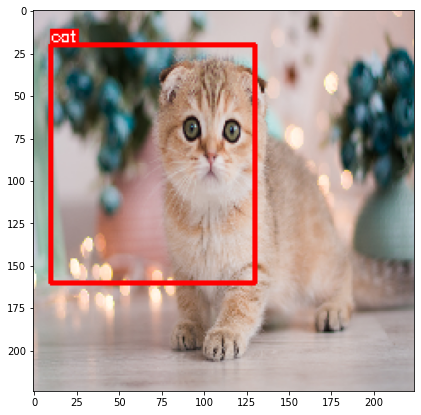

In [94]:
annotations = {'image': x[0], 'bboxes': [[10,20,120,140]], 'category_id': y[0]}
img = visualize(annotations,{0: 'dog', 1: 'cat'})

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


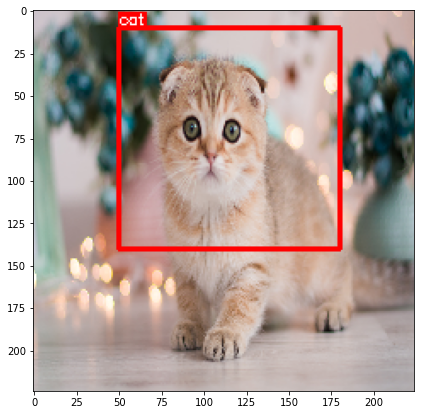

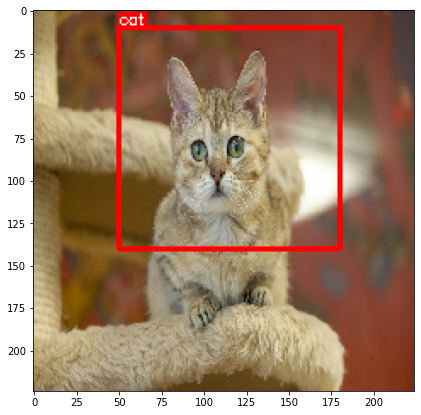

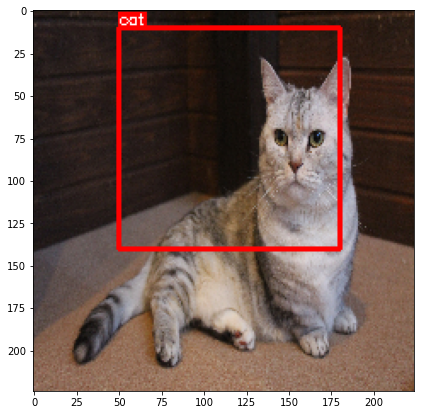

In [103]:
for i in range(3):
    annotations = {'image': x[i], 'bboxes': [[50,10,130,130]], 'category_id': y[i]}
    img = visualize(annotations,{0: 'dog', 1: 'cat'})

## 問題4　物体検出データセットに対するデータ拡張

データ拡張（Data Augmentation）を行ってください。

前述のalbumentationsはバウンディングボックスを合わせての加工が可能です。

詳細はREADME.mdを確認してください。


物体検出の学習を行なうかどうかは任意とします。


xmlファイルを扱うライブラリがありますので下記をご確認ください。


In [104]:
# ライブラリの読み込み
import albumentations as A

In [165]:
# albumentations用にピクセル数を画像に対する割合に変更
for i in range(2):
    annotations = {'image': x[i+6], 'bboxes': [[60/IMG_WIDTH,10/IMG_HEIGHT,130/IMG_WIDTH,130/IMG_HEIGHT]], 'category_id': y[i+5]}

In [166]:
# データ拡張
aug = A.Compose([
    A.RandomCrop(width=100, height=100),
    A.RandomBrightnessContrast(p=0.2),
], bbox_params=A.BboxParams(format='albumentations',label_fields=['category_id']))
augmented = aug(**annotations)

In [167]:
# 拡張後も割合で帰ってくるので、描画用に元に戻す
augmented['bboxes'] = [[
    augmented['bboxes'][0][0]*augmented['image'].shape[0],
    augmented['bboxes'][0][1]*augmented['image'].shape[1],
    augmented['bboxes'][0][2]*augmented['image'].shape[0],
    augmented['bboxes'][0][3]*augmented['image'].shape[1]
]]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


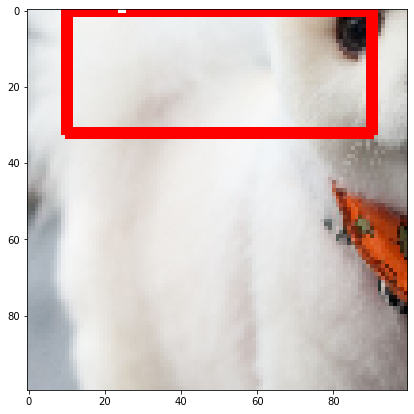

In [168]:
# 描画
visualize(augmented,{0: 'dog', 1: 'cat'})